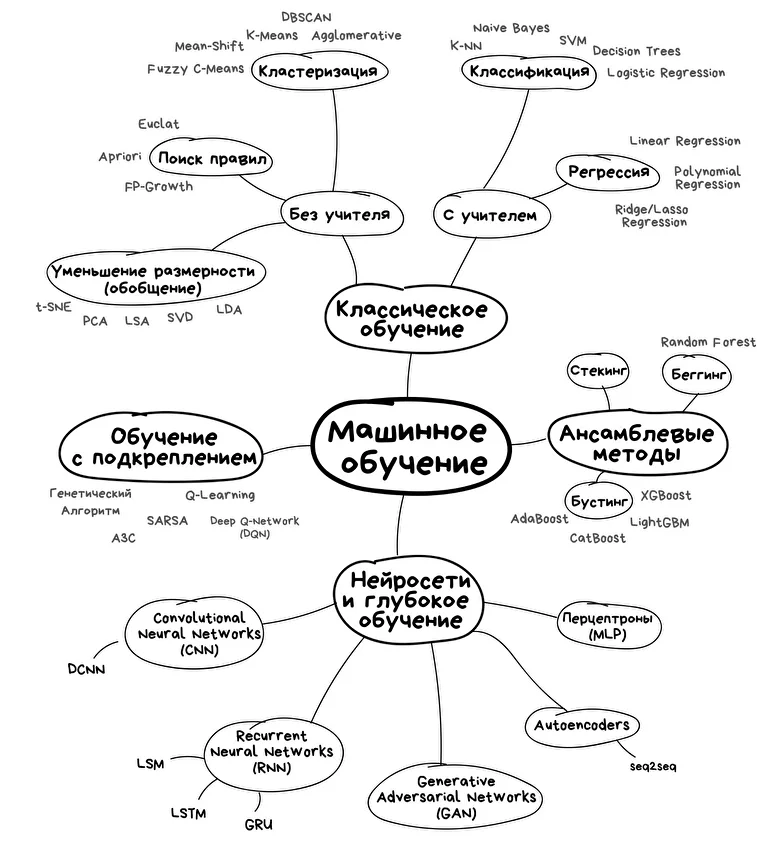

# Данные как таблица


Лучше всего представлять используемые данные в Scikit-learn в виде таблицы. Рассмотрим набор данных Ирис

In [1]:
import seaborn as sns
import pandas as pd
import sklearn

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/home/alex/jupyter/environment/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


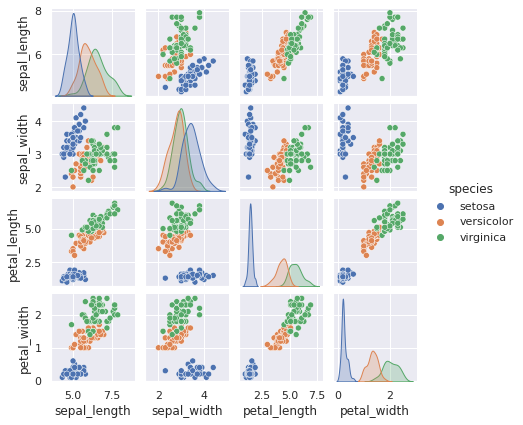

In [6]:
# Визуализируем данные

sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [7]:
type(iris)

pandas.core.frame.DataFrame

In [12]:
# Для использования набора данных в Sklearn мы извлечем матрицу признаков и целевой массив из объекта DataFrame

X_iris = iris.drop('species', axis=1)
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y_iris = iris['species']
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

# Основы API статистического оценивания

# Пример обучения с учителем: простая линейная регрессия

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x - 1 + rng.randn(50)
x, y

(array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
        1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
        0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
        1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
        6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
        7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
        6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
        8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
        1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
        6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456]),
 array([ 7.22926896, 18.18565441, 13.52423055, 10.67206599,  0.64185082,
         1.4000462 , -0.29896653, 17.38064514, 11.36591852, 11.3984114 ,
        -0.26422614, 18.01311476, 14.97193082,  3.8584585 ,  3.66749887,
         3.59937032,  4.24562734,  9.18591626,  7.9701638 ,  5.80012793,
        10.75788366,  1.60

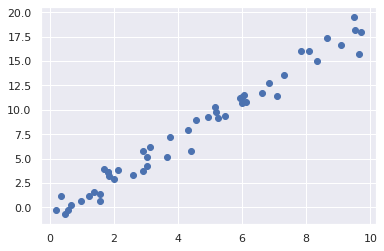

In [16]:
plt.scatter(x, y)

In [21]:
# Воспользуемся описанным выше планом:
    
# 1) Выбираем модель

# Каждый класс модели в sklearn предствлен соответствующим классом языка Python

from sklearn.linear_model import LinearRegression

# 2) Выбираем гиперпараметры модели (то есть параметры, необходимые для обучения) 

# Класс модели не то же самое, что экземпляр модели!

# Создадим экземпляр класса LinearRegression и укажем с помощью гиперпараметра fit_intercept, что нам
# хотелось бы выполнить подбор точки пересечения с осью координат:
    
model = LinearRegression(fit_intercept=True)
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [30]:
# 3) Формирование из данных матриц признаков и целевого вектора:

X = x[:, np.newaxis] # добавили новое измерение
X.shape

(50, 1)

In [36]:
# 4) Обучение модели на наших данных

model.fit(X, y)

# В sklearn все парамеры модели, полученные в процессе выполнения команды fit() содержат в конце названия знак _

LinearRegression()

In [34]:
model.coef_ # угловой коэф.

array([1.9776566])

In [35]:
model.intercept_ # пересечение с осью координат, сдвиг

-0.9033107255311146

In [37]:
# 5) Предсказание на новых данных

xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [39]:
Xfit = xfit[:, np.newaxis]
Xfit

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163],
       [ 1.44897959],
       [ 1.69387755],
       [ 1.93877551],
       [ 2.18367347],
       [ 2.42857143],
       [ 2.67346939],
       [ 2.91836735],
       [ 3.16326531],
       [ 3.40816327],
       [ 3.65306122],
       [ 3.89795918],
       [ 4.14285714],
       [ 4.3877551 ],
       [ 4.63265306],
       [ 4.87755102],
       [ 5.12244898],
       [ 5.36734694],
       [ 5.6122449 ],
       [ 5.85714286],
       [ 6.10204082],
       [ 6.34693878],
       [ 6.59183673],
       [ 6.83673469],
       [ 7.08163265],
       [ 7.32653061],
       [ 7.57142857],
       [ 7.81632653],
       [ 8.06122449],
       [ 8.30612245],
       [ 8.55102041],
       [ 8.79591837],
       [ 9.04081633],
       [ 9.28571429],
       [ 9.53061224],
       [ 9.7755102 ],
       [10

In [40]:
yfit = model.predict(Xfit)

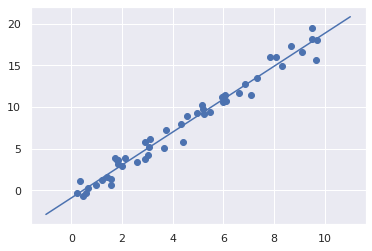

In [42]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [43]:
# Таким образом мы построили регрисионную апроксимацию наших данных.

# Пример обучения с учителем: классификация набора данных


In [44]:
# Для классификации воспользуемся простой обобщенной моделью Гауссовым наивным байесовский классификатор,
# исходящей из допущения, что все классы взяты из выровненного по осям координат Гауссова распределения


In [57]:
# Будем классифицировать Ирисы, разобьем выборку на тестовую и тренировочную

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size=0.8)
X_train

,sepal_length,sepal_width,petal_length,petal_width
101,5.8,2.7,5.1,1.9
26,5.0,3.4,1.6,0.4
95,5.7,3.0,4.2,1.2
36,5.5,3.5,1.3,0.2
54,6.5,2.8,4.6,1.5
...,...,...,...,...
147,6.5,3.0,5.2,2.0
89,5.5,2.5,4.0,1.3
50,7.0,3.2,4.7,1.4
66,5.6,3.0,4.5,1.5


In [58]:
# начинаем алгоритм

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [59]:
# Воспользуемся утилитой accuracy_score для опеределения точности правильно опредленных меток в классах

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

1.0

In [60]:
# Очень высокая точность!

In [61]:
y_model

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor'], dtype='<U10')

In [62]:
y_test

131     virginica
120     virginica
69     versicolor
87     versicolor
132     virginica
100     virginica
34         setosa
105     virginica
136     virginica
13         setosa
143     virginica
30         setosa
12         setosa
19         setosa
85     versicolor
10         setosa
58     versicolor
53     versicolor
113     virginica
43         setosa
42         setosa
22         setosa
64     versicolor
37         setosa
0          setosa
109     virginica
139     virginica
25         setosa
115     virginica
65     versicolor
Name: species, dtype: object